In [3]:
from google.colab.patches import cv2_imshow
import os, json, cv2, random
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

In [4]:
im=cv2.imread('/content/IMG_20220503_151020 (1).jpg')
cv2_imshow(im)

Output hidden; open in https://colab.research.google.com to view.

In [5]:
## Image matrix having RGB channel
im[:,:,0]

array([[227, 227, 227, ..., 102,  98,  97],
       [227, 227, 227, ..., 103, 101,  98],
       [227, 227, 227, ..., 106, 105, 101],
       ...,
       [183, 185, 189, ..., 216, 216, 216],
       [180, 181, 187, ..., 218, 218, 218],
       [180, 180, 185, ..., 219, 219, 219]], dtype=uint8)

In [6]:
im[:,:,1]

array([[166, 166, 166, ..., 138, 134, 130],
       [166, 166, 166, ..., 139, 134, 131],
       [165, 165, 165, ..., 139, 136, 132],
       ...,
       [189, 191, 195, ..., 221, 221, 221],
       [189, 190, 194, ..., 223, 223, 223],
       [189, 189, 192, ..., 224, 224, 224]], dtype=uint8)

In [7]:
im[:,:,2]

array([[ 50,  50,  50, ..., 146, 142, 139],
       [ 50,  50,  50, ..., 147, 143, 140],
       [ 47,  47,  47, ..., 148, 145, 141],
       ...,
       [194, 196, 200, ..., 220, 219, 219],
       [192, 193, 197, ..., 222, 221, 221],
       [192, 192, 195, ..., 223, 222, 222]], dtype=uint8)

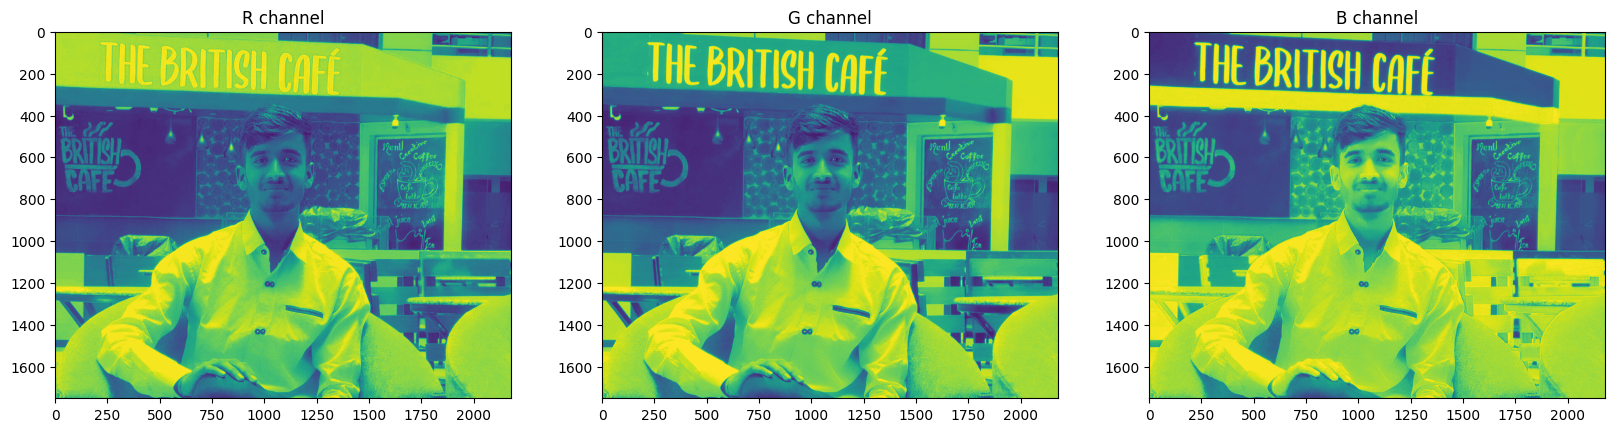

In [8]:
r=im[:,:,0]
g=im[:,:,1]
b=im[:,:,2]
# Viualize the individual color channels

f, (ax1, ax2, ax3)=plt.subplots(1,3, figsize=(20, 10))
ax1.set_title('R channel')
ax1.imshow(r)
ax2.set_title('G channel')
ax2.imshow(g)
ax3.set_title('B channel')
ax3.imshow(b)


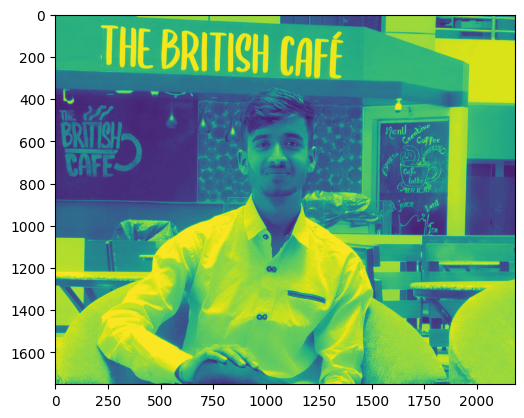

In [9]:
gray_image=cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)
plt.imshow(gray_image)

In [10]:
# Filter for horizontal scale data
filter_hor=np.array([[-1,-2, -1],
                     [0, 0, 0],
                     [1, 2 ,1]
                     ])
# Filter for vertical scale data
filter_ver=np.array([[-1, 0, 1],
                     [-2, 0, 2],
                     [-1, 0, 1]
                     ])

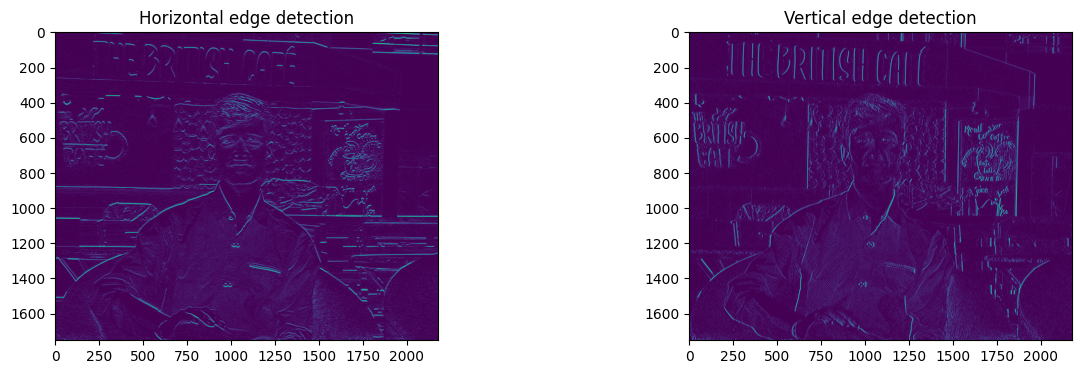

In [11]:
# Filter the image using filter2D
filtered_image1=cv2.filter2D(gray_image, -1, filter_hor)   # -1 indicate that image shoud be in same scale.
filtered_image2=cv2.filter2D(gray_image, -1, filter_ver)
f, (ax1, ax2)=plt.subplots(1,2, figsize=(15, 4))
ax1.set_title('Horizontal edge detection')
ax1.imshow(filtered_image1)
ax2.set_title('Vertical edge detection')
ax2.imshow(filtered_image2)


In [12]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

In [13]:
(x_train_full, y_train_full), (x_test, y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [14]:
x_train_full.shape, y_train_full.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

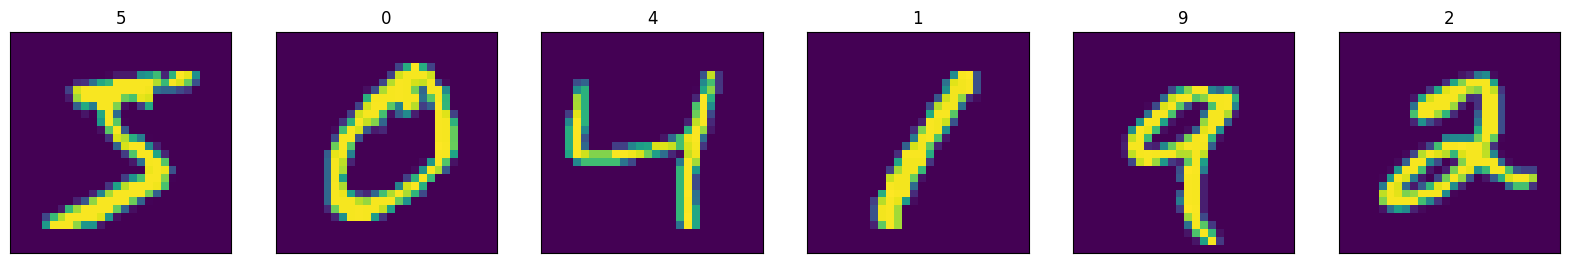

In [15]:
# plot first six training images.
fig=plt.figure(figsize=(20,20))
for i in range(6):
  ax=fig.add_subplot(1,6, i+1, xticks=[], yticks=[])
  ax.imshow(x_train_full[i])
  ax.set_title(y_train_full[i])

### Prepocess input image: Rescale the images by dividing every pixel in every image by 255

In [16]:
## Rescale to have value 0-1:
x_train_scaled=x_train_full/255
x_test_scaled=x_test/255

In [17]:
x_train_scaled.shape

(60000, 28, 28)

In [18]:
x_train_scaled[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

### Preprocess the labels, Encode Categorical integer labels using one hot.

In [19]:
from keras.utils import to_categorical

In [20]:
# One host encode the labels
n_classes=10
y_train_encode_=to_categorical(y_train_full,n_classes)
y_test_encode=to_categorical(y_test, n_classes)

In [21]:
y_train_encode_[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [22]:
x_train_scaled.shape[0]

60000

In [23]:
x_train_scaled.shape[1]

28

In [24]:
x_train_scaled=x_train_scaled.reshape(x_train_scaled.shape[0], x_train_scaled.shape[1], x_train_scaled.shape[2],1)
x_test_scaled=x_test_scaled.reshape(x_test_scaled.shape[0], x_test_scaled.shape[1],x_test_scaled.shape[2],1 )


In [25]:
x_train_scaled.shape[1:]

(28, 28, 1)

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling1D

In [27]:
## Build the model object
model=Sequential()

# Conv1: add CONV layer with RELU activation and depth=32 kernels
model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu', input_shape=x_train_scaled.shape[1:]))

# POOL_1: Downsample the image to choose the best features.
model.add(MaxPooling2D(pool_size=(2,2)))

# Conv2: here we increase the depth to 64
model.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))

# POOL_2: more downsampling.
model.add(MaxPooling2D(pool_size=(2,2)))

# Flatten since too many dimensions, we only want to classfication output
model.add(Flatten())

# FC_1: Fully connected to get all relevent adata.
model.add(Dense(64, activation='relu'))

# FC_2: Output a softmax to squash the maxtrix into output probabilities for the 1- classes.
model.add(Dense(10, activation='softmax'))

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 64)                2

## Compile the Model

In [29]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop',
              metrics=['accuracy'])

In [30]:
## Train the model
from tensorflow.keras.callbacks import ModelCheckpoint
checkpointer=ModelCheckpoint(filepath='model_best.hdf5', verbos=1, save_best_only=True)


hist=model.fit(x_train_scaled, y_train_encode_, batch_size=64, epochs=10, validation_data=(x_test_scaled, y_test_encode), callbacks=[checkpointer])



Epoch 1/10
938/938 [==============================] - 9s 5ms/step - loss: 0.1614 - accuracy: 0.9507 - val_loss: 0.0725 - val_accuracy: 0.9750
Epoch 2/10
 43/938 [>.............................] - ETA: 3s - loss: 0.0562 - accuracy: 0.9818

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


938/938 [==============================] - 4s 5ms/step - loss: 0.0487 - accuracy: 0.9851 - val_loss: 0.0358 - val_accuracy: 0.9877
Epoch 3/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0320 - accuracy: 0.9904 - val_loss: 0.0242 - val_accuracy: 0.9932
Epoch 4/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0233 - accuracy: 0.9929 - val_loss: 0.0221 - val_accuracy: 0.9929
Epoch 5/10
938/938 [==============================] - 5s 6ms/step - loss: 0.0188 - accuracy: 0.9941 - val_loss: 0.0298 - val_accuracy: 0.9903
Epoch 6/10
938/938 [==============================] - 4s 5ms/step - loss: 0.0148 - accuracy: 0.9953 - val_loss: 0.0267 - val_accuracy: 0.9923
Epoch 7/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0112 - accuracy: 0.9966 - val_loss: 0.0291 - val_accuracy: 0.9915
Epoch 8/10
938/938 [==============================] - 5s 5ms/step - loss: 0.0097 - accuracy: 0.9970 - val_loss: 0.0251 - val_accuracy: 0.9923
Epoch 9/10
938/93

In [31]:
model.load_weights('/content/model_best.hdf5')

In [32]:
score=model.evaluate(x_test_scaled, y_test_encode)

313/313 [==============================] - 1s 5ms/step - loss: 0.0221 - accuracy: 0.9929
